# IRIS FLOWER DATASET


## Bài toán phân loại hoa IRIS

| | | |
|:-------------------------:|:-------------------------:|:-------------------------:|
| 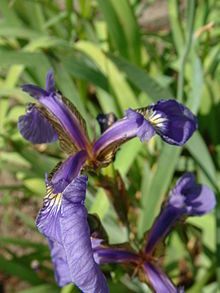 | 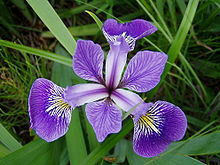  | 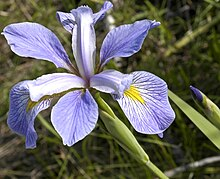 |
| Iris Setosa | Iris Versicolor |  Iris Virginica |

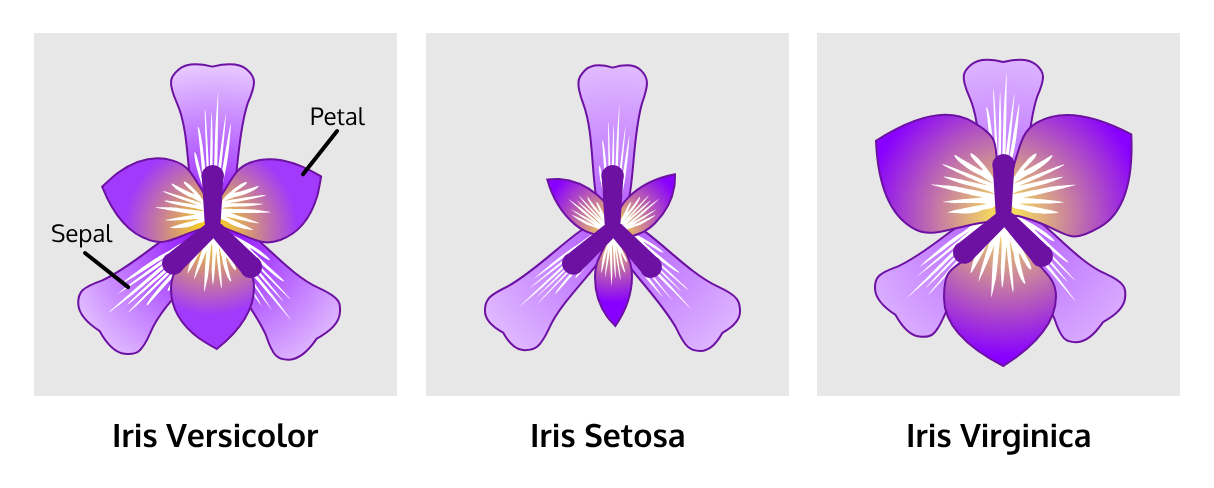

## Bộ dữ liệu IRIS

**Link tải:** https://archive.ics.uci.edu/dataset/53/iris  
- Bộ dữ liệu bao gồm **150 mẫu**
- Mỗi mẫu có 5 thuộc tính:
    - **sepal length**(độ dài lá đài),
    - **sepal width**(độ rộng lá đài),
    - **petal length**(độ dài cánh hoa),
    - **petal width**(độ rộng cánh hoa)
    - và **species**(Loại hoa).  
![image.png](attachment:3ca01be7-b16f-42e2-9c7d-cdba98922d11.png)

## 1. LOAD DỮ LIỆU

In [1]:
import pandas as pd

In [2]:
col_names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv('./Dataset/iris.data', names=col_names)

In [3]:
dataset.head(10)

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
dataset.tail()

,sepal-length,sepal-width,petal-length,petal-width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


## 2.KIỂM TRA DỮ LIỆU

**Các thuộc tính**

In [5]:
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


**Phân bố của các thuộc tính**

In [9]:
!pip install matplotlib

   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------- ----------------------------- 2.1/7.8 MB 13.0 MB/s eta 0:00:01
   -------------------------------------- - 7.6/7.8 MB 19.6 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 16.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 24.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 2.6/2.6 MB 24.4 MB/s eta 0:00:00


In [6]:
from matplotlib import pyplot as plt

<Figure size 2000x1000 with 0 Axes>

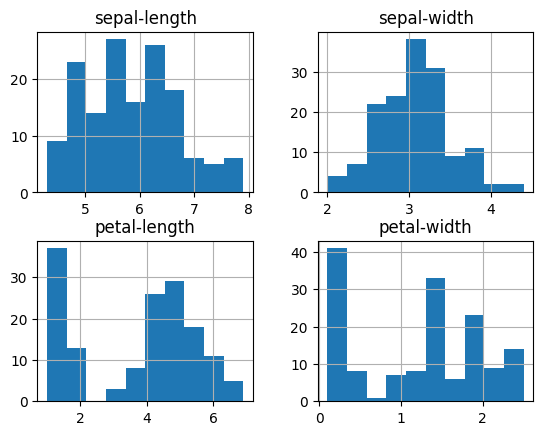

In [7]:
plt.figure(figsize=(20,10))
dataset.hist()
plt.show()

**Phân bố của nhãn**

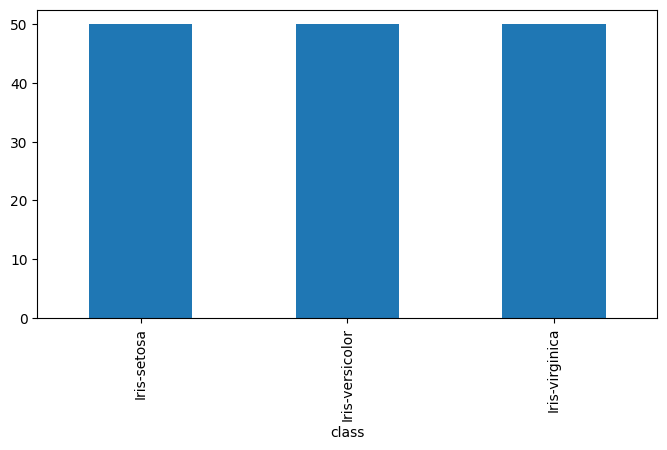

In [15]:
plt.figure(figsize=(8,4))
dataset["class"].value_counts().plot(kind='bar')
plt.show()

## Count each of class

In [11]:
dataset.groupby("class").count()

,sepal-length,sepal-width,petal-length,petal-width
class,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


**Tương quan giữa thuộc tính**

In [12]:
from pandas.plotting import scatter_matrix

<Figure size 1600x800 with 0 Axes>

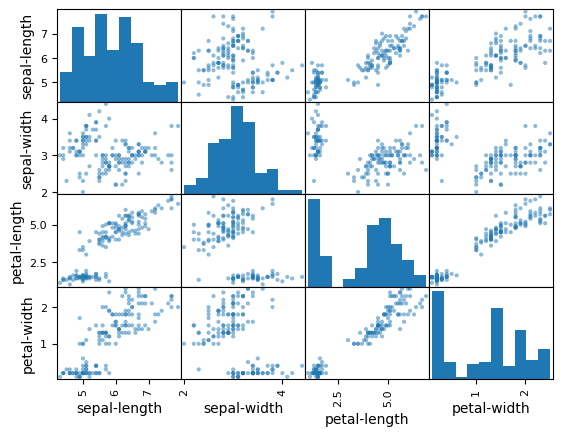

In [14]:
plt.figure(figsize=(20,10),dpi=80)
scatter_matrix(dataset)
plt.show()

## 3. CHIA DỮ LIỆU THÀNH CÁC TẬP TRAIN, VAL, TEST

In [16]:
!pip install scikit-learn

   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   -------- ------------------------------- 2.4/10.9 MB 14.9 MB/s eta 0:00:01
   ---------------------------- ----------- 7.9/10.9 MB 20.3 MB/s eta 0:00:01
   ---------------------------------------- 10.9/10.9 MB 20.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
   --- ------------------------------------ 3.7/44.5 MB 18.2 MB/s eta 0:00:03
   ------- -------------------------------- 8.7/44.5 MB 20.7 MB/s eta 0:00:02
   ------------ --------------------------- 13.6/44.5 MB 22.0 MB/s eta 0:00:02
   -------------- ------------------------- 16.5/44.5 MB 20.0 MB/s eta 0:00:02
   ------------------ --------------------- 20.2/44.5 MB 20.9 MB/s eta 0:00:02
   ------------------- -------------------- 21.2/44.5 MB 17.0 MB/s eta 0:00:02
   ------------------- -------------------- 21.2/44.5 MB 17.0 MB/s eta 0:00:02
   ------------------- -------------------- 22.0/44.5 MB 13.1 MB/s eta 0:0

In [17]:
from sklearn.model_selection import train_test_split
import numpy as np

In [33]:
array = dataset.values
X = array[:, 0:4]
Y = array[:, 4]
test_size = 0.20    
random_seed = 12345
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=random_seed, stratify=Y)

In [34]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((120, 4), (120,), (30, 4), (30,))

In [35]:
val_size = 0.1
random_seed = 12345
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=val_size, random_state=random_seed, stratify=Y_train)

In [36]:
X_train.shape, Y_train.shape, X_val.shape, Y_val.shape

((108, 4), (108,), (12, 4), (12,))

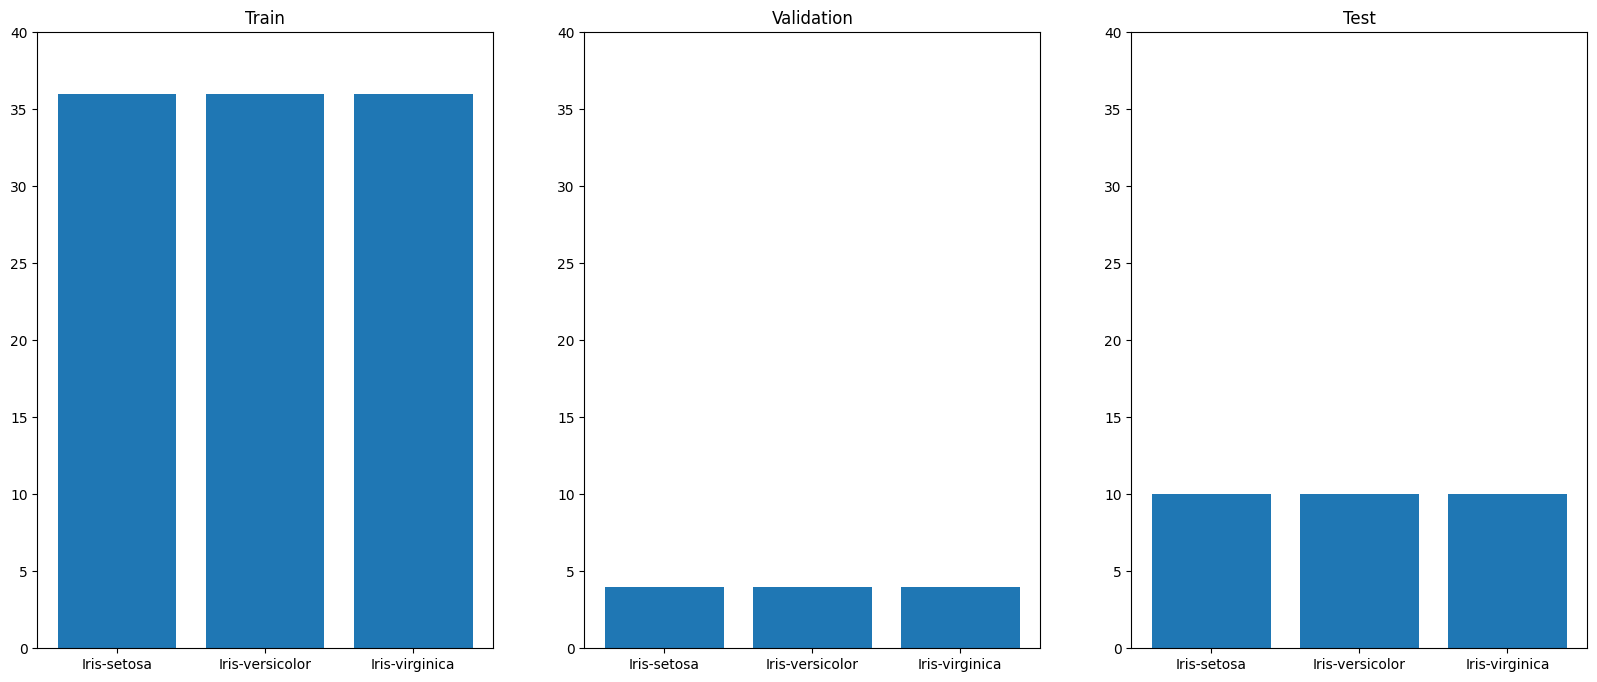

In [37]:
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
plt.title("Train")
values, counts = np.unique(Y_train, return_counts=True)
plt.ylim(0,40)
plt.bar(values, counts)
plt.subplot(1,3,2)
plt.title("Validation")
values, counts = np.unique(Y_val, return_counts=True)
plt.ylim(0,40)
plt.bar(values, counts)
plt.subplot(1,3,3)
plt.title("Test")
values, counts = np.unique(Y_test, return_counts=True)
plt.ylim(0,40)
plt.bar(values, counts)
plt.show()

## 4. Mô hình

### Mô hình K-Nearest Neighbors

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_10 = KNeighborsClassifier(n_neighbors=10)
knn_15 = KNeighborsClassifier(n_neighbors=15)

### Huấn luyện mô hình

In [40]:
knn_5.fit(X_train, Y_train)
knn_10.fit(X_train, Y_train)
knn_15.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=15)

### Đánh giá mô hình với tập Validation

**Dự đoán của mô hình**

In [41]:
pred_knn5 = knn_5.predict(X_val)
pred_knn10 = knn_10.predict(X_val)
pred_knn15 = knn_15.predict(X_val)

**Độ chính xác của dự đoán**

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
print(f'{"Model":12} Accuracy')
print(f'{"KNN_5:":12} {accuracy_score(Y_val, pred_knn5)*100:.2f}%')
print(f'{"KNN_10:":12} {accuracy_score(Y_val, pred_knn10)*100:.2f}%')
print(f'{"KNN_15:":12} {accuracy_score(Y_val, pred_knn15)*100:.2f}%')

Model        Accuracy
KNN_5:       91.67%
KNN_10:      100.00%
KNN_15:      100.00%


## Đánh giá mô hình

**Dự đoán trên tập Test**

In [44]:
pred = knn_10.predict(X_test)

**Độ chính xác trên tập test**

In [45]:
print(f'Độ chính xác của mô hình: {accuracy_score(Y_test, pred)*100:.2f}%')

Độ chính xác của mô hình: 96.67%


**Classìication Report**

In [49]:
from sklearn.metrics import classification_report

In [50]:
print(classification_report(Y_test, pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



**Confusion Matrix**

In [52]:
from sklearn.metrics import ConfusionMatrixDisplay

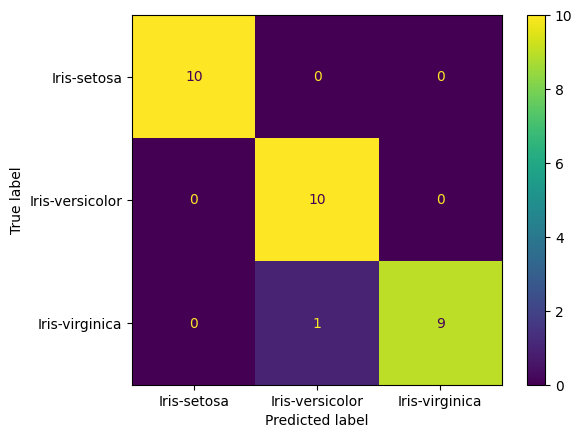

In [53]:
ConfusionMatrixDisplay.from_predictions(Y_test, pred)